## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  27.957749  1688.012154  0.400126   4.267340  1.432001
1  81.551279   728.702483  0.995201  10.639601  1.401554
2  64.888630   987.093448  0.294018  10.358235  1.464613
3  36.065826   800.676736  0.174126   3.524755  1.268913
4  34.001045  1673.454693  0.216733   7.600075  1.353364


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9143831	total: 67.9ms	remaining: 1m 7s
1:	learn: 0.9067244	total: 68.5ms	remaining: 34.2s
2:	learn: 0.8989244	total: 68.9ms	remaining: 22.9s
3:	learn: 0.8916564	total: 69.5ms	remaining: 17.3s
4:	learn: 0.8843828	total: 70.2ms	remaining: 14s
5:	learn: 0.8766292	total: 70.8ms	remaining: 11.7s
6:	learn: 0.8679128	total: 71.3ms	remaining: 10.1s
7:	learn: 0.8588623	total: 71.9ms	remaining: 8.91s
8:	learn: 0.8506936	total: 72.4ms	remaining: 7.98s
9:	learn: 0.8412607	total: 72.9ms	remaining: 7.22s
10:	learn: 0.8340083	total: 73.5ms	remaining: 6.61s
11:	learn: 0.8249172	total: 73.9ms	remaining: 6.08s
12:	learn: 0.8166510	total: 74.5ms	remaining: 5.65s
13:	learn: 0.8104251	total: 75ms	remaining: 5.28s
14:	learn: 0.8026097	total: 75.5ms	remaining: 4.95s
15:	learn: 0.7955167	total: 75.9ms	remaining: 4.67s
16:	learn: 0.7874045	total: 76.4ms	remaining: 4.42s
17:	learn: 0.7810944	total: 76.8ms	remaining: 4.19s
18:	learn: 0.7745667	total: 77.2ms	remaining: 3.

91:	learn: 0.4208670	total: 108ms	remaining: 1.06s
92:	learn: 0.4173704	total: 108ms	remaining: 1.05s
93:	learn: 0.4142467	total: 109ms	remaining: 1.05s
94:	learn: 0.4113732	total: 110ms	remaining: 1.05s
95:	learn: 0.4090824	total: 110ms	remaining: 1.04s
96:	learn: 0.4066609	total: 111ms	remaining: 1.03s
97:	learn: 0.4038637	total: 111ms	remaining: 1.02s
98:	learn: 0.4010145	total: 112ms	remaining: 1.02s
99:	learn: 0.3983942	total: 112ms	remaining: 1.01s
100:	learn: 0.3963099	total: 112ms	remaining: 1s
101:	learn: 0.3942383	total: 113ms	remaining: 994ms
102:	learn: 0.3912929	total: 113ms	remaining: 986ms
103:	learn: 0.3895152	total: 114ms	remaining: 978ms
104:	learn: 0.3871202	total: 114ms	remaining: 971ms
105:	learn: 0.3847083	total: 114ms	remaining: 964ms
106:	learn: 0.3821696	total: 115ms	remaining: 958ms
107:	learn: 0.3797232	total: 115ms	remaining: 951ms
108:	learn: 0.3773425	total: 116ms	remaining: 946ms
109:	learn: 0.3742456	total: 116ms	remaining: 939ms
110:	learn: 0.3718115	to

277:	learn: 0.1715956	total: 185ms	remaining: 482ms
278:	learn: 0.1710885	total: 186ms	remaining: 480ms
279:	learn: 0.1706376	total: 186ms	remaining: 479ms
280:	learn: 0.1699225	total: 187ms	remaining: 478ms
281:	learn: 0.1690984	total: 187ms	remaining: 476ms
282:	learn: 0.1685519	total: 187ms	remaining: 475ms
283:	learn: 0.1679204	total: 188ms	remaining: 474ms
284:	learn: 0.1672423	total: 188ms	remaining: 473ms
285:	learn: 0.1667079	total: 189ms	remaining: 471ms
286:	learn: 0.1664141	total: 189ms	remaining: 470ms
287:	learn: 0.1658354	total: 189ms	remaining: 468ms
288:	learn: 0.1651068	total: 190ms	remaining: 467ms
289:	learn: 0.1646784	total: 190ms	remaining: 466ms
290:	learn: 0.1641185	total: 191ms	remaining: 465ms
291:	learn: 0.1637836	total: 191ms	remaining: 463ms
292:	learn: 0.1632064	total: 191ms	remaining: 462ms
293:	learn: 0.1624957	total: 192ms	remaining: 461ms
294:	learn: 0.1613009	total: 192ms	remaining: 460ms
295:	learn: 0.1608833	total: 193ms	remaining: 459ms
296:	learn: 

512:	learn: 0.0838253	total: 290ms	remaining: 275ms
513:	learn: 0.0834809	total: 290ms	remaining: 274ms
514:	learn: 0.0832233	total: 291ms	remaining: 274ms
515:	learn: 0.0830350	total: 291ms	remaining: 273ms
516:	learn: 0.0828725	total: 292ms	remaining: 273ms
517:	learn: 0.0825682	total: 292ms	remaining: 272ms
518:	learn: 0.0823076	total: 293ms	remaining: 271ms
519:	learn: 0.0821254	total: 293ms	remaining: 271ms
520:	learn: 0.0818949	total: 294ms	remaining: 270ms
521:	learn: 0.0817167	total: 294ms	remaining: 269ms
522:	learn: 0.0815201	total: 295ms	remaining: 269ms
523:	learn: 0.0812953	total: 295ms	remaining: 268ms
524:	learn: 0.0810050	total: 295ms	remaining: 267ms
525:	learn: 0.0807527	total: 296ms	remaining: 267ms
526:	learn: 0.0805071	total: 296ms	remaining: 266ms
527:	learn: 0.0803625	total: 297ms	remaining: 265ms
528:	learn: 0.0801150	total: 297ms	remaining: 265ms
529:	learn: 0.0799306	total: 298ms	remaining: 264ms
530:	learn: 0.0797122	total: 298ms	remaining: 263ms
531:	learn: 

685:	learn: 0.0512200	total: 368ms	remaining: 169ms
686:	learn: 0.0511425	total: 369ms	remaining: 168ms
687:	learn: 0.0510528	total: 369ms	remaining: 167ms
688:	learn: 0.0509080	total: 370ms	remaining: 167ms
689:	learn: 0.0507563	total: 370ms	remaining: 166ms
690:	learn: 0.0507304	total: 370ms	remaining: 166ms
691:	learn: 0.0505809	total: 371ms	remaining: 165ms
692:	learn: 0.0505554	total: 371ms	remaining: 164ms
693:	learn: 0.0504079	total: 371ms	remaining: 164ms
694:	learn: 0.0503827	total: 372ms	remaining: 163ms
695:	learn: 0.0502451	total: 372ms	remaining: 163ms
696:	learn: 0.0500168	total: 373ms	remaining: 162ms
697:	learn: 0.0498719	total: 373ms	remaining: 161ms
698:	learn: 0.0496695	total: 374ms	remaining: 161ms
699:	learn: 0.0496445	total: 374ms	remaining: 160ms
700:	learn: 0.0494462	total: 374ms	remaining: 160ms
701:	learn: 0.0493324	total: 375ms	remaining: 159ms
702:	learn: 0.0491906	total: 375ms	remaining: 159ms
703:	learn: 0.0490793	total: 376ms	remaining: 158ms
704:	learn: 

923:	learn: 0.0288293	total: 472ms	remaining: 38.8ms
924:	learn: 0.0287149	total: 473ms	remaining: 38.3ms
925:	learn: 0.0286998	total: 473ms	remaining: 37.8ms
926:	learn: 0.0286281	total: 474ms	remaining: 37.3ms
927:	learn: 0.0285694	total: 474ms	remaining: 36.8ms
928:	learn: 0.0284841	total: 475ms	remaining: 36.3ms
929:	learn: 0.0284215	total: 475ms	remaining: 35.8ms
930:	learn: 0.0283597	total: 475ms	remaining: 35.2ms
931:	learn: 0.0282409	total: 476ms	remaining: 34.7ms
932:	learn: 0.0281789	total: 476ms	remaining: 34.2ms
933:	learn: 0.0280626	total: 477ms	remaining: 33.7ms
934:	learn: 0.0280330	total: 477ms	remaining: 33.2ms
935:	learn: 0.0280041	total: 478ms	remaining: 32.7ms
936:	learn: 0.0278807	total: 478ms	remaining: 32.2ms
937:	learn: 0.0278203	total: 479ms	remaining: 31.6ms
938:	learn: 0.0278057	total: 479ms	remaining: 31.1ms
939:	learn: 0.0277454	total: 480ms	remaining: 30.6ms
940:	learn: 0.0276859	total: 480ms	remaining: 30.1ms
941:	learn: 0.0276272	total: 481ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

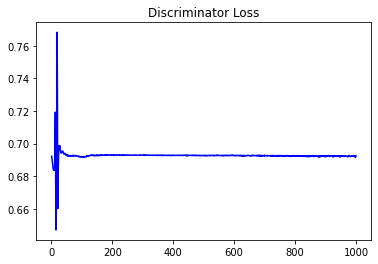

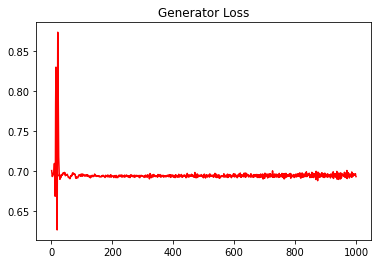

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6433564974384507


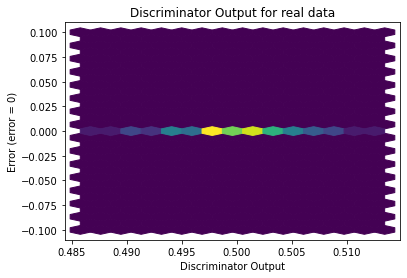

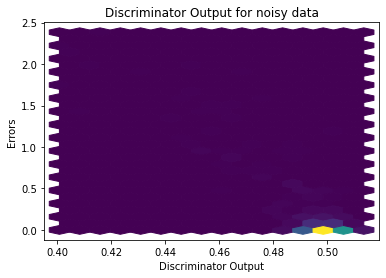

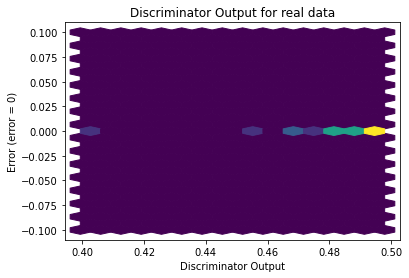

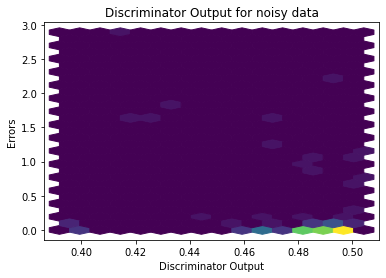

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


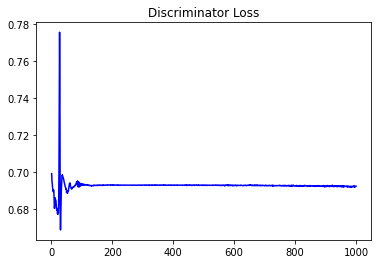

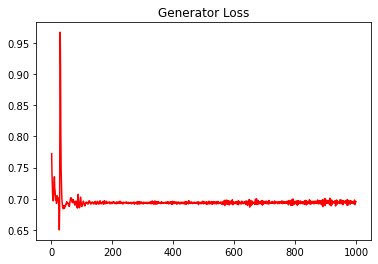

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.660904103271643


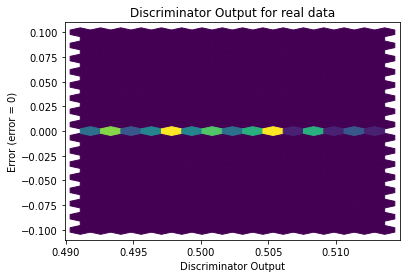

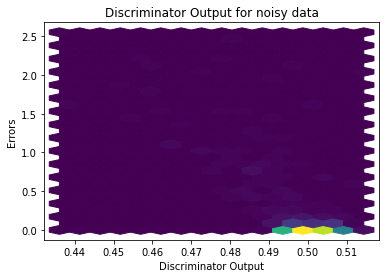

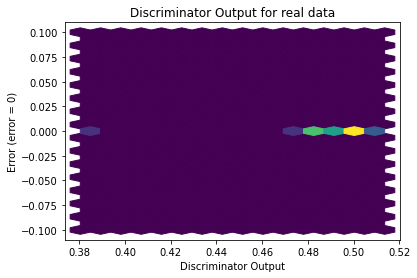

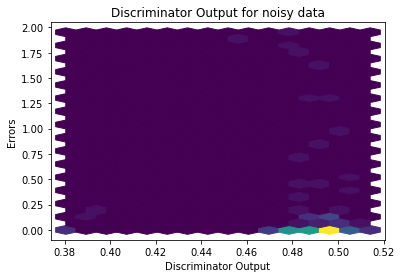

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5182]], requires_grad=True)
